# Telecom Customer Churn Analysis

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv("Telecom_Customer_Churn_Data.csv")

## Overview of the dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preparation

### 1. Replacing blank values as 0 & converting the datatype of the attribute

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2. Checking for null values in the dataset

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 3. Descriptive analysis of the dataset

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### 4. Checking for duplicate values

In [9]:
df.duplicated().sum()

0

In [10]:
df["customerID"].duplicated().sum()

0

### 5. Converting numerical values into categorical values

In [11]:
def convert(value):
    if value == 1:
        return "Yes"
    else:
        return "No"


df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert) 

##### Note: 0 denotes 'No' & 1 denotes 'Yes'

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Visualization

### 1. Analysis of Customers By Churn

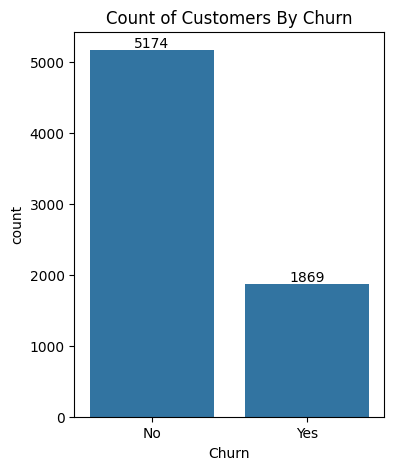

In [13]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers By Churn")
plt.show()

In [14]:
gb = df["Churn"].value_counts()

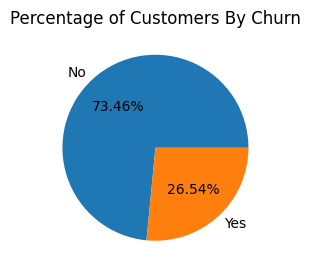

In [15]:
plt.figure(figsize=(3,4))
plt.pie(x = gb, labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage of Customers By Churn")
plt.show()

#### From the given pie chart we can conclude that 26.54% have churned out.

### 2. Comparing the Churn Rate of the Customers By Gender

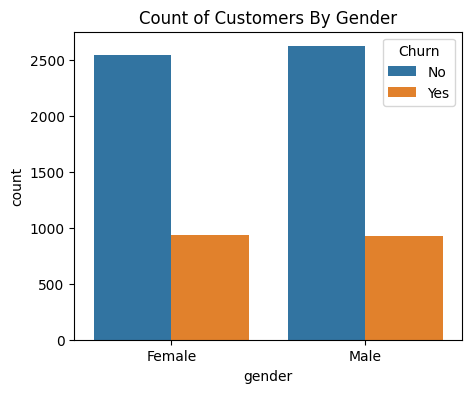

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x = "gender", data=df, hue="Churn")
plt.title("Count of Customers By Gender")
plt.show()

### 3. Analyzing the number of Churned Customers in the Senior Citizen category 

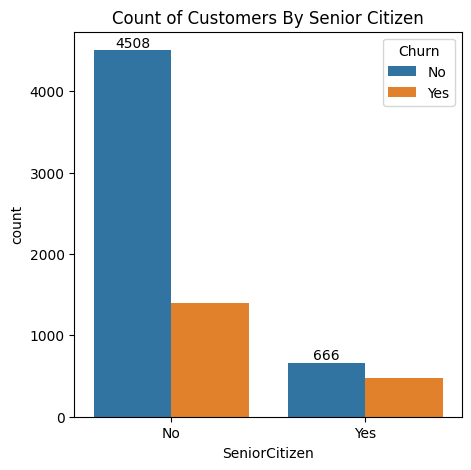

In [17]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = "SeniorCitizen", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers By Senior Citizen")
plt.show()

#### A greater percentage of senior citizens have churned out comparatively as per the above figure.

### 4. Analysis of the churned customers over a Tenure & as per the Contract

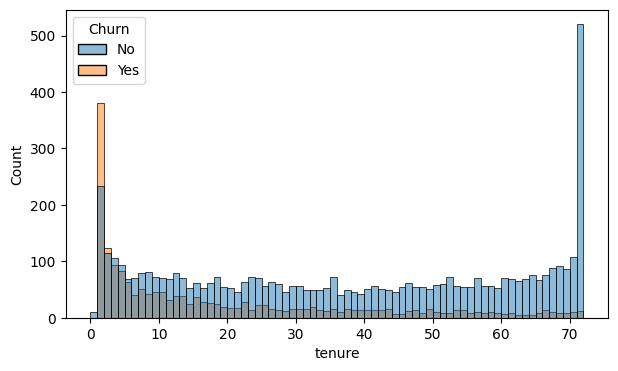

In [18]:
plt.figure(figsize = (7,4))
sns.histplot( x = "tenure", data=df, bins=72, hue = "Churn")
plt.show()

#### Early customers have churned out from the service whereas the long term customers have stayed with the service.

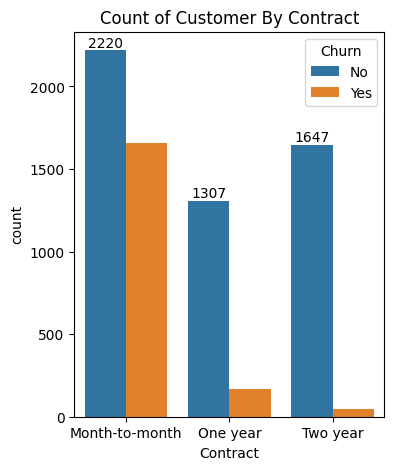

In [19]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x = "Contract", data=df, hue="Churn")
plt.title("Count of Customer By Contract")
ax.bar_label(ax.containers[0])
plt.show()

#### From the above chart we can conclude that people who have a month-to-month contract are more likely to churn as compared to the people having a contract of one year or two year.

### 5. Analyzing the essential services by the churned customers

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

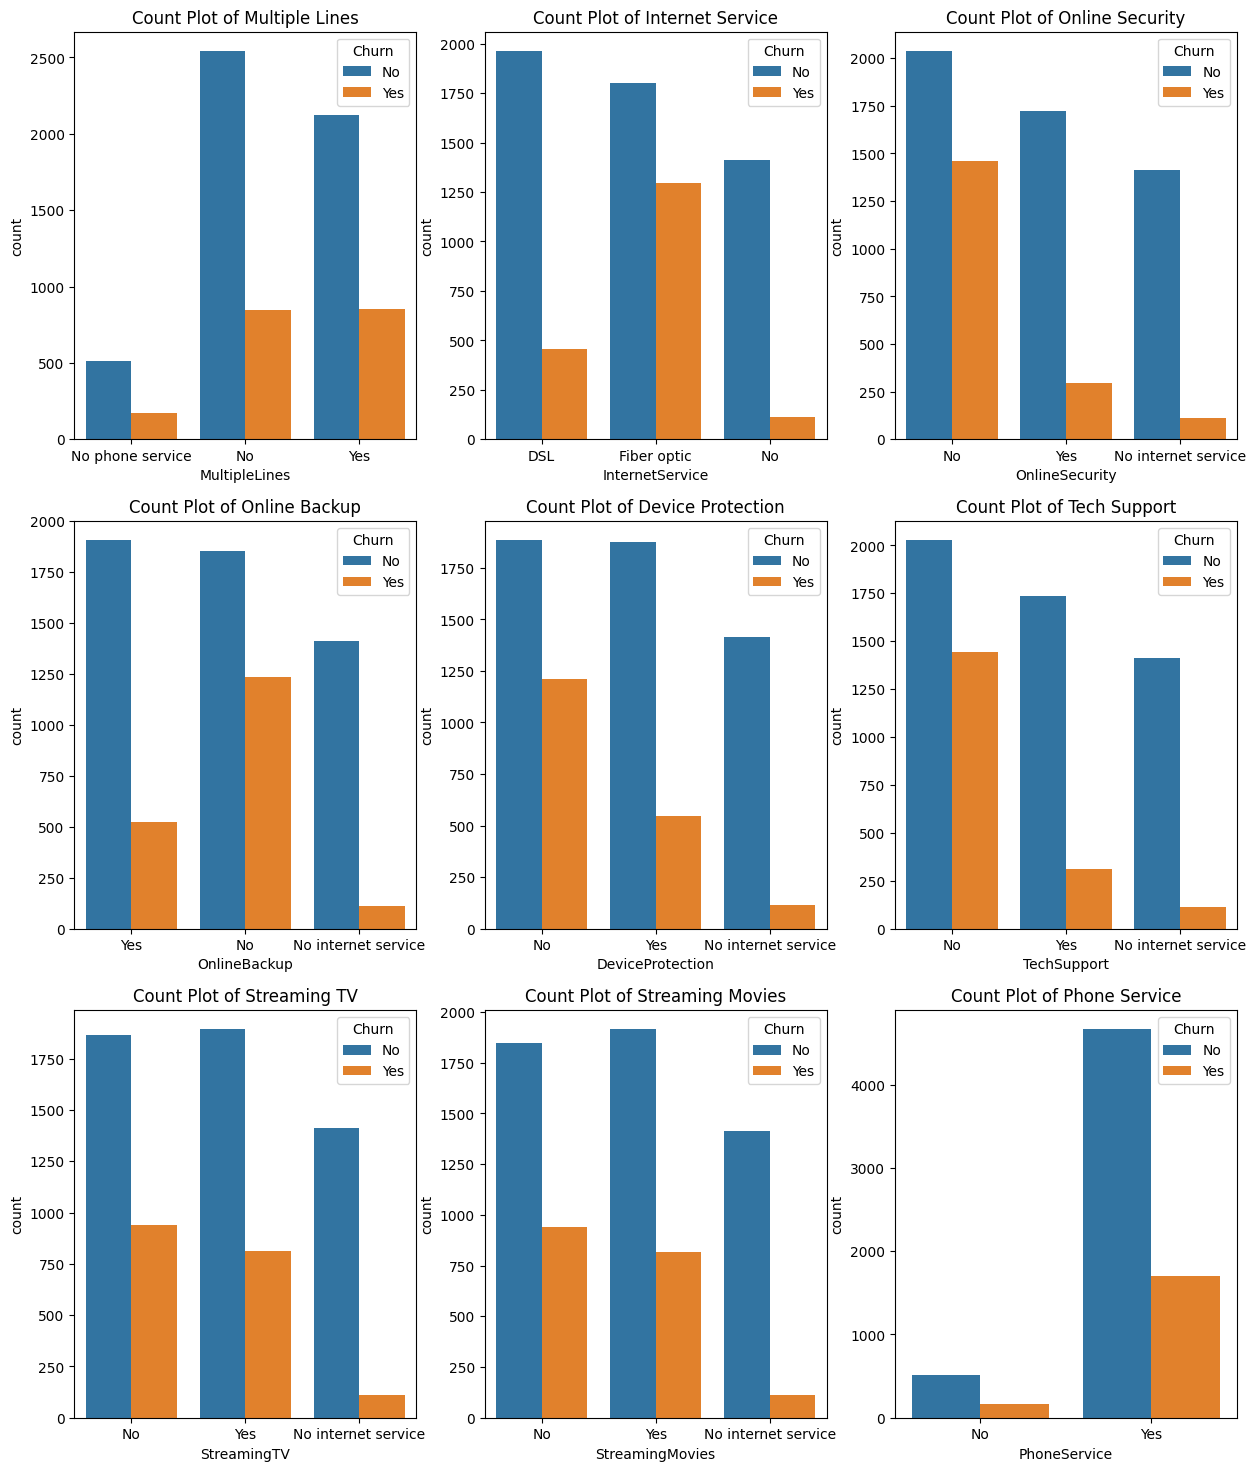

In [21]:
fig , ax = plt.subplots(3,3, figsize=(15,18))

sns.countplot(x = "PhoneService", data=df, hue="Churn")
plt.title("Count Plot of Phone Service")
plt.subplot(3,3,1)

sns.countplot(x = "MultipleLines", data=df, hue="Churn")
plt.title("Count Plot of Multiple Lines")
plt.subplot(3,3,2)

sns.countplot(x = "InternetService", data=df, hue="Churn")
plt.title("Count Plot of Internet Service")
plt.subplot(3,3,3)

sns.countplot(x = "OnlineSecurity", data=df, hue="Churn")
plt.title("Count Plot of Online Security")
plt.subplot(3,3,4)

sns.countplot(x = "OnlineBackup", data=df, hue="Churn")
plt.title("Count Plot of Online Backup")
plt.subplot(3,3,5)

sns.countplot(x = "DeviceProtection", data=df, hue="Churn")
plt.title("Count Plot of Device Protection")
plt.subplot(3,3,6)

sns.countplot(x = "TechSupport", data=df, hue="Churn")
plt.title("Count Plot of Tech Support")
plt.subplot(3,3,7)

sns.countplot(x = "StreamingTV", data=df, hue="Churn")
plt.title("Count Plot of Streaming TV")
plt.subplot(3,3,8)

sns.countplot(x = "StreamingMovies", data=df, hue="Churn")
plt.title("Count Plot of Streaming Movies")
plt.subplot(3,3,9)

plt.show()

#### Observations from the above charts: 
##### 1. Customers who have taken multiple lines have churned out.
##### 2. Customers who have taken fibre optics internet service have churned out. 
##### 3. Majority of the customers who have not taken the online security service have churned out as compared to the rest. 
##### 4. Alot of the customers who have not had online backup have churned.
##### 5. As per the chart the customers having device protection are less likely to churn as compared to the ones having device protection. 
##### 6. Customers with no tech support have churned alot more than the others.
##### 7. An almost equal portion of the customers streaming tv and not streaming tv have churned out.
##### 8. A little more customers streaming movies have churned as compared to the customers not streaming movies. 
##### 9. Customers who have taken phone service have churned out more. 
##### 10. Specific services like fiber-optic internet and tech support appear to have a higher churn rate compared to others.

### 6. Looking at the churned customers count by payment mode

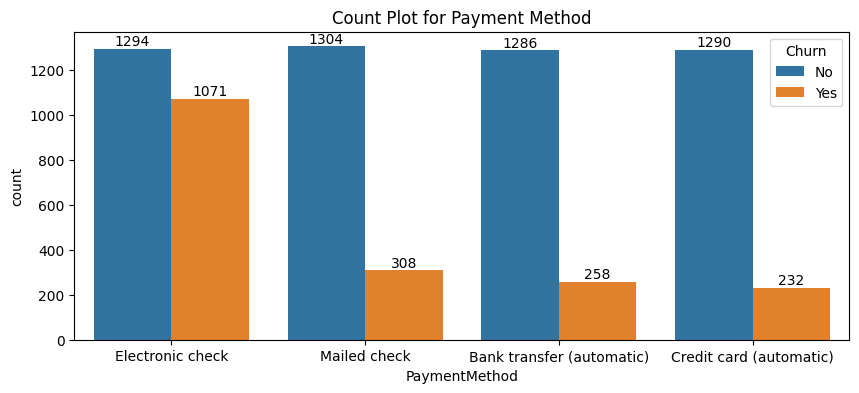

In [22]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x = "PaymentMethod", data=df, hue = "Churn")
plt.title("Count Plot for Payment Method")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

#### Customers using payment method as electronic check are more likely to churn